In [1]:
#Loading the necessary libraries
import ISLP
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [2]:
#Read the data

data = pd.read_csv('Housing.csv')
print(data.head())

    SERIAL  DENSITY  OWNERSHP  OWNERSHPD  COSTELEC  COSTGAS  COSTWATR  \
0  1371772    920.0         1         13      9990     9993       360   
1  1371773   3640.9         2         22      1080     9993      1800   
2  1371773   3640.9         2         22      1080     9993      1800   
3  1371774     22.5         1         13       600     9993      9993   
4  1371775   3710.4         2         22      3600     9993      9997   

   COSTFUEL  HHINCOME   VALUEH  ...  NFAMS  NCOUPLES  PERNUM  PERWT  AGE  \
0      9993     75000   700000  ...      1         0       1     14   52   
1      9993     13600  9999999  ...      2         0       1     83   22   
2      9993     13600  9999999  ...      2         0       2    106   22   
3      9993      7000   800000  ...      1         0       1     33   62   
4      9993     50500  9999999  ...      1         0       1    297   50   

   MARST  BIRTHYR  EDUC  EDUCD  INCTOT  
0      6     1969     7     71   75000  
1      6     1999    1

In [3]:
data.shape

(75388, 24)

In [4]:
#Considering the rows that have the highest age for that particular serial number
data = data.loc[data.groupby('SERIAL')['AGE'].idxmax()]

#Modify the DENSITY column
data['Low_DENSITY'] = (data['DENSITY'].between(0,1000, inclusive=True)).astype(int)
data['Medium_DENSITY'] = (data['DENSITY'].between(1000+1,3000, inclusive=True)).astype(int)
data['High_DENSITY'] = (data['DENSITY'].between(3000+1,14000, inclusive=True)).astype(int)
data.drop('DENSITY', axis=1, inplace=True)

#Modify the HHINCOME(HouseHold Income) column
data['Low_HHINCOME'] = (data['HHINCOME'].between(-7100,100000, inclusive=True)).astype(int)
data['Medium_HHINCOME'] = (data['HHINCOME'].between(100000+1,250000, inclusive=True)).astype(int)
data['High_HHINCOME'] = (data['HHINCOME'].between(250000+1,1700000, inclusive=True)).astype(int)
data.drop('HHINCOME', axis=1, inplace=True)

#Modify the MARST(Marital Status) column
data['Married'] = (data['MARST'].between(0,2, inclusive=True)).astype(int)
data['Seperated'] = (data['MARST'].between(2+1,5, inclusive=True)).astype(int)
data['Single'] = (data['MARST'].between(5+1,9, inclusive=True)).astype(int)
data.drop('MARST', axis=1, inplace=True)

#Modify the EDUC(Educational attainment) column
data['No_Education'] = (data['EDUC'] ==0).astype(int)
data['Primary_Education'] = (data['EDUC'].between(1,2, inclusive=True)).astype(int)
data['Secondary_Education'] = (data['EDUC'].between(2+1,6, inclusive=True)).astype(int)
data['College'] = (data['EDUC'].between(6+1,11, inclusive=True)).astype(int)
data.drop('EDUC', axis=1, inplace=True)

#Drop the columns that look like they wont contribute to Ownership
columns_to_drop = ['SERIAL', 'OWNERSHPD', 'COSTELEC', 'COSTGAS', 'COSTWATR', 'COSTFUEL',
                   'VALUEH', 'BUILTYR2', 'PERNUM', 'PERWT', 'BIRTHYR', 'EDUCD', 'INCTOT']
data = data.drop(columns_to_drop, axis=1)

C:\Users\neela\AppData\Local\Temp\ipykernel_6492\2592000663.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['Low_DENSITY'] = (data['DENSITY'].between(0,1000, inclusive=True)).astype(int)
C:\Users\neela\AppData\Local\Temp\ipykernel_6492\2592000663.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['Medium_DENSITY'] = (data['DENSITY'].between(1000+1,3000, inclusive=True)).astype(int)
C:\Users\neela\AppData\Local\Temp\ipykernel_6492\2592000663.py:7: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['High_DENSITY'] = (data['DENSITY'].between(3000+1,14000, inclusive=True)).astype(int)
C:\Users\neela\AppData\Local\Temp\ipykernel_6492\2592000663.py:11: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data['Low_HHINCOME'] = (data['HH

In [4]:
print(data)

       OWNERSHP  ROOMS  BEDROOMS  VEHICLES  NFAMS  NCOUPLES  AGE  Low_DENSITY  \
0             1      7         4         2      1         0   52            1   
1             2      6         4         2      2         0   22            0   
3             1      5         4         2      1         0   62            1   
4             2      4         3         2      1         0   50            0   
7             1      5         4         2      1         1   93            1   
...         ...    ...       ...       ...    ...       ...  ...          ...   
75373         1      7         4         3      1         0   51            1   
75375         1      6         4         1      1         1   65            1   
75378         1      8         5         3      1         1   70            0   
75382         1      6         4         2      1         1   70            0   
75386         2      8         5         2      1         2   64            0   

       Medium_DENSITY  High

In [5]:
X= data.drop('OWNERSHP', axis=1)
y = data['OWNERSHP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (21561, 19)
y_train shape: (21561,)
X_test shape: (9241, 19)
y_test shape: (9241,)


Linear

In [21]:
svm_linear = SVC(C=1, kernel='linear')
svm_linear.fit(X, y)

SVC(C=1, kernel='linear')

In [22]:
svm_linear.support_vectors_.shape[0]

13085

In [23]:
accuracy_linear_train = svm_linear.score(X_train, y_train)
accuracy_linear_train

0.8259820973053198

In [24]:
accuracy_linear_test = svm_linear.score(X_test, y_test)
accuracy_linear_test

0.8294556866140028

In [11]:
param_grid = {'C': [0.1, 1, 10]}

svm_linear = SVC(kernel='linear')
grid_search = GridSearchCV(estimator=svm_linear, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_score = grid_search.best_score_
print("Best Mean Cross-validated Score:", best_score)

Best Parameters: {'C': 0.1}
Best Mean Cross-validated Score: 0.826121119779826


In [9]:
svm_linear = SVC(C=0.1, kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [18]:
train_accuracy_linear = svm_linear.score(X_train, y_train)
train_accuracy_linear

0.8262603775335096

In [19]:
test_accuracy_linear = svm_linear.score(X_test, y_test)
test_accuracy_linear

0.8280489124553619

Feature Importance for Linear model

In [20]:
svm_linear = SVC(C=0.1, kernel='linear')
svm_linear.fit(X_train, y_train)

coefficients = svm_linear.coef_
feature_names = X_train.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

print(coefficients_df)

                Feature  Coefficient  Absolute_Coefficient
1              BEDROOMS    -0.593302              0.593302
16    Primary_Education     0.362950              0.362950
3                 NFAMS     0.354441              0.354441
9          Low_HHINCOME     0.353145              0.353145
18              College    -0.277083              0.277083
12              Married    -0.275316              0.275316
11        High_HHINCOME    -0.272779              0.272779
6           Low_DENSITY    -0.262100              0.262100
8          High_DENSITY     0.187440              0.187440
14               Single     0.153297              0.153297
17  Secondary_Education    -0.144805              0.144805
13            Seperated     0.122019              0.122019
0                 ROOMS    -0.112564              0.112564
10      Medium_HHINCOME    -0.080366              0.080366
7        Medium_DENSITY     0.074659              0.074659
2              VEHICLES     0.063603              0.0636

C:\Users\neela\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


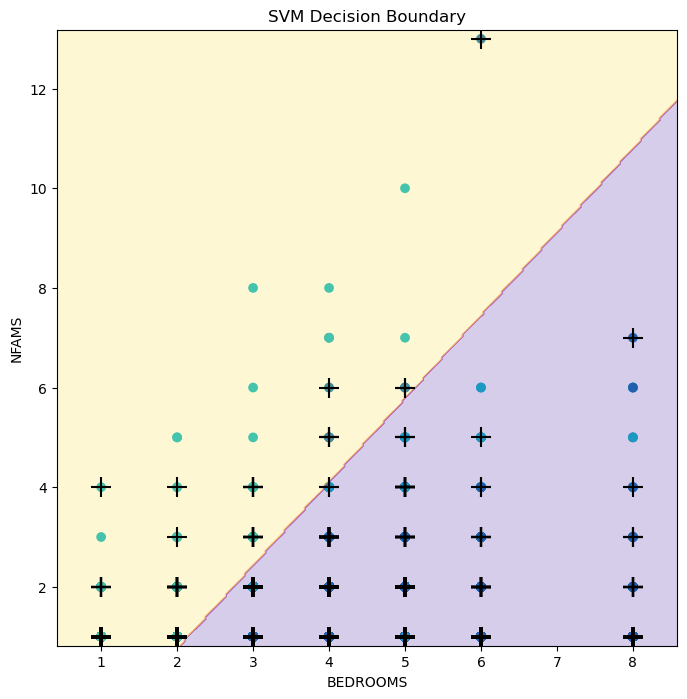

In [10]:
BEDROOMS = X.columns.get_loc('BEDROOMS')
NFAMS = X.columns.get_loc('NFAMS')
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear,features=(BEDROOMS, NFAMS),
         ax=ax)

plt.xlabel('BEDROOMS')
plt.ylabel('NFAMS')
plt.title('SVM Decision Boundary')

plt.show()

Radial

In [26]:
svm_rbf = SVC(C=1, kernel="rbf", gamma=1)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=1)

In [27]:
accuracy_rbf_train = svm_rbf.score(X_train, y_train)
accuracy_rbf_train

0.9606697277491768

In [28]:
accuracy_rbf_test = svm_rbf.score(X_test, y_test)
accuracy_rbf_test

0.7755654149983768

In [29]:
param_grid = {'C': [0.01, 0.1, 1, 10],
              'gamma': [0.01, 0.1, 1, 10]}

svm_rbf = SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svm_rbf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_score = grid_search.best_score_
print("Best Mean Cross-validated Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 0.01}
Best Mean Cross-validated Score: 0.8305737131604112


In [34]:
svm_rbf = SVC(C=10, kernel="rbf", gamma=0.01)
svm_rbf.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [35]:
accuracy_rbf_train = svm_rbf.score(X_train, y_train)
accuracy_rbf_train

0.837391586661101

In [36]:
accuracy_rbf_test = svm_rbf.score(X_test, y_test)
accuracy_rbf_test

0.8348663564549291

Feature Importance for Radial model

In [6]:
svm_radial = SVC(C=10, kernel="rbf", gamma=0.01)
svm_radial.fit(X_train, y_train)

importance_radial = permutation_importance(svm_radial, X_test, y_test, n_jobs=-1)
importance_scores_radial = importance_radial.importances_mean
feature_names_radial = X_train.columns

sorted_indices_radial = importance_scores_radial.argsort()[::-1]
sorted_feature_names_radial = feature_names_radial[sorted_indices_radial]
sorted_importance_scores_radial = importance_scores_radial[sorted_indices_radial]

for feature_name, importance_score in zip(sorted_feature_names_radial, sorted_importance_scores_radial):
    print(f"Feature: {feature_name}, Importance Score: {importance_score}")

Feature: AGE, Importance Score: 0.05495076290444756
Feature: BEDROOMS, Importance Score: 0.05412834108862676
Feature: ROOMS, Importance Score: 0.029542257331457655
Feature: VEHICLES, Importance Score: 0.013786386754680224
Feature: NFAMS, Importance Score: 0.0032896872632832254
Feature: College, Importance Score: 0.0024023374093713025
Feature: Married, Importance Score: 0.0011687046856400762
Feature: Low_HHINCOME, Importance Score: 0.0011470620062763893
Feature: Primary_Education, Importance Score: 0.0004328535872741179
Feature: Medium_HHINCOME, Importance Score: 0.000324640190455594
Feature: NCOUPLES, Importance Score: 0.0002380694730007793
Feature: No_Education, Importance Score: 0.0001514987555459646
Feature: High_HHINCOME, Importance Score: 0.00015149875554592017
Feature: Low_DENSITY, Importance Score: 0.00012985607618223315
Feature: Secondary_Education, Importance Score: 0.0
Feature: Single, Importance Score: -2.1642679363709227e-05
Feature: Seperated, Importance Score: -0.00017314

C:\Users\neela\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


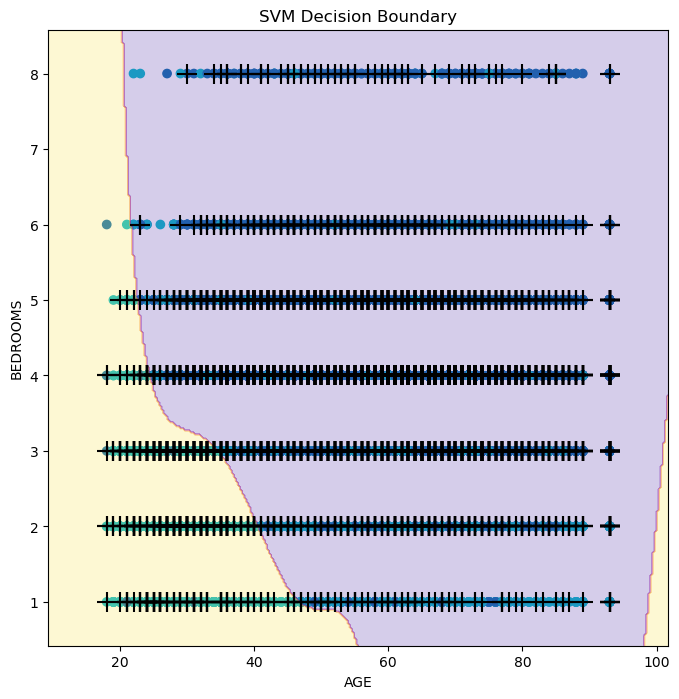

In [11]:
AGE = X.columns.get_loc('AGE')
BEDROOMS = X.columns.get_loc('BEDROOMS')
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_radial,features=(AGE, BEDROOMS),
         ax=ax)

plt.xlabel('AGE')
plt.ylabel('BEDROOMS')
plt.title('SVM Decision Boundary')

plt.show()

Polynomial

In [7]:
svm_poly = SVC(C=1, kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='poly')

In [8]:
accuracy_poly_train = svm_poly.score(X_train, y_train)
accuracy_poly_train

0.8227354946431056

In [9]:
accuracy_poly_test = svm_poly.score(X_test, y_test)
accuracy_poly_test

0.8297803268044583

In [40]:
param_grid = {'C': [0.01, 0.1, 1, 10],
              'degree': [2, 3, 4, 5]}

svm_poly = SVC(kernel='poly')
grid_search = GridSearchCV(estimator=svm_poly, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_score = grid_search.best_score_
print("Best Mean Cross-validated Score:", best_score)

Best Parameters: {'C': 10, 'degree': 2}
Best Mean Cross-validated Score: 0.8238021393663804


In [12]:
svm_poly = SVC(C=10, kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)

SVC(C=10, degree=2, kernel='poly')

In [11]:
accuracy_poly_train = svm_poly.score(X_train, y_train)
accuracy_poly_train

0.8238022355178332

In [12]:
accuracy_poly_test = svm_poly.score(X_test, y_test)
accuracy_poly_test

0.8307542473758252

Feature Importance for Polynomial model

In [6]:
svm_poly = SVC(C=10, kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)

importance_poly = permutation_importance(svm_poly, X_test, y_test, n_jobs=-1)
importance_scores_poly = importance_poly.importances_mean
feature_names_poly = X_train.columns

sorted_indices_poly = importance_scores_poly.argsort()[::-1]
sorted_feature_names_poly = feature_names_poly[sorted_indices_poly]
sorted_importance_scores_poly = importance_scores_poly[sorted_indices_poly]

for feature_name, importance_score in zip(sorted_feature_names_poly, sorted_importance_scores_poly):
    print(f"Feature: {feature_name}, Importance Score: {importance_score}")

Feature: BEDROOMS, Importance Score: 0.06129206795801321
Feature: AGE, Importance Score: 0.047137755654150015
Feature: ROOMS, Importance Score: 0.014587165891137333
Feature: College, Importance Score: 0.00428525051401365
Feature: VEHICLES, Importance Score: 0.002878476355372839
Feature: Married, Importance Score: 0.0026187642030083723
Feature: Low_HHINCOME, Importance Score: 0.00246726544746243
Feature: High_HHINCOME, Importance Score: 0.0013851314792771685
Feature: NFAMS, Importance Score: 0.0013634887999134592
Feature: Low_DENSITY, Importance Score: 0.0011470620062764114
Feature: Secondary_Education, Importance Score: 0.0008657071745482358
Feature: Medium_HHINCOME, Importance Score: 0.0007791364570934212
Feature: Medium_DENSITY, Importance Score: 0.0005410669840926197
Feature: Seperated, Importance Score: 0.0004761389460015364
Feature: NCOUPLES, Importance Score: 0.00045449626663782714
Feature: Primary_Education, Importance Score: 0.0001514987555459646
Feature: No_Education, Importan

C:\Users\neela\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


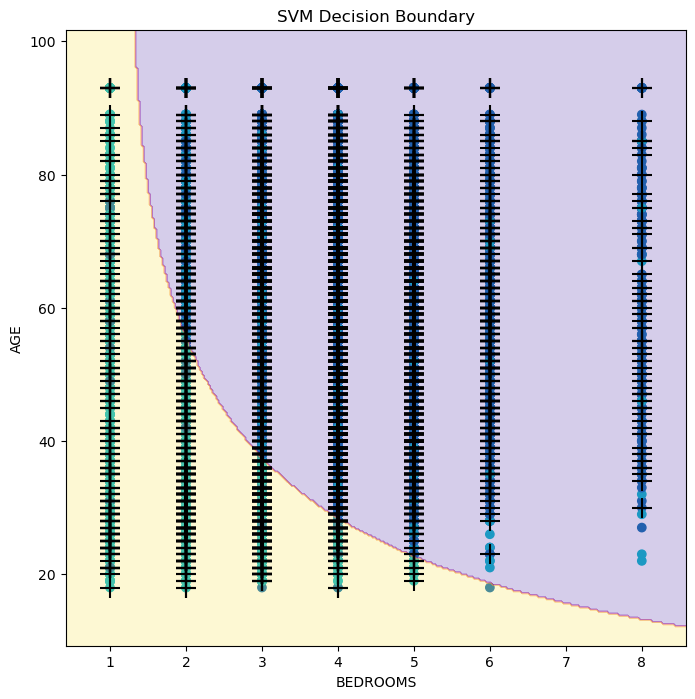

In [13]:
BEDROOMS = X.columns.get_loc('BEDROOMS')
AGE = X.columns.get_loc('AGE')
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_poly,features=(BEDROOMS, AGE),
         ax=ax)

plt.xlabel('BEDROOMS')
plt.ylabel('AGE')
plt.title('SVM Decision Boundary')

plt.show()